In [73]:
import numpy as np
import os
from scipy import stats
import chempy.equilibria as eq
import scipy.optimize as op
import matplotlib.pyplot as plt

#Parameter settings for plotting
plt.rcParams["figure.figsize"] = [8, 3] # Change default plot size
plt.rcParams["lines.linewidth"] = 1.0 # Change default line width
plt.rcParams.update({"font.size": 10}) # Change default font size
plt.rcParams['figure.constrained_layout.use'] = True # Change layout

In [74]:
# Data
S=np.array([0.2, 0.4, 0.8, 1.0, 2.0, 4.0])
v=np.array([5.0, 7.5, 10.0, 10.7, 12.5, 13.6])
v_A=np.array([3, 5, 7.5, 8.3, 10.7, 12.5])
v_B=np.array([2, 3, 4, 4.3, 5, 5.5])

In [75]:
x=np.linspace(-3,5,400)

a) Plot the data in the Lineweaver-Burk format (*Make sure to label both the inhibitor line
and the no inhibitor line)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


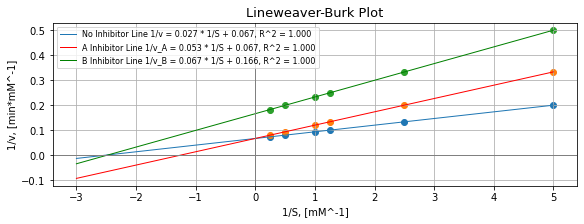

In [76]:
#Plot
plt.figure(figsize=(8,3))

#Linear regressions of data
slope, intercept, r_value, p_value, std_err = stats.linregress(1/S,1/v)
plt.plot(x, slope*x+intercept)

slopeA, interceptA, r_valueA, p_valueA, std_errA = stats.linregress(1/S,1/v_A)
plt.plot(x, slopeA*x+interceptA, 'r')

slopeB, interceptB, r_valueB, p_valueB, std_errB = stats.linregress(1/S,1/v_B)
plt.plot(x, slopeB*x+interceptB, 'g')

#Lines to show where are the lines x=0 and y=0 on the graph
plt.axvline(x = 0, color = 'gray')
plt.axhline(y = 0, color = 'gray')

#Data
plt.scatter(1/S, 1/v)
plt.scatter(1/S, 1/v_A)
plt.scatter(1/S, 1/v_B)

plt.legend([f"No Inhibitor Line 1/v = {slope:.3f} * 1/S + {intercept:.3f}, R^2 = {r_value*r_value:.3f}", f"A Inhibitor Line 1/v_A = {slopeA:.3f} * 1/S + {interceptA:.3f}, R^2 = {r_valueA*r_valueA:.3f}",  f"B Inhibitor Line 1/v_B = {slopeB:.3f} * 1/S + {interceptB:.3f}, R^2 = {r_valueB*r_valueB:.3f}"], fontsize=8)
plt.grid()
plt.xlabel("1/S, [mM^-1]")
plt.ylabel("1/v, [min*mM^-1]")
plt.title("Lineweaver-Burk Plot", fontsize = 13)
plt.savefig(f"Lineweaver-Burk_Plot_1.eps")

b) Determine the Km and Vmax values from Lineweaver-Burk plot.

In [77]:
#Determination of parameters by looking at the equations and the slopes/yintercepts given by the regression
vmax=1/intercept
print("Vmax", vmax)
Km=vmax*slope
print("Km", Km)

Vmax 14.978316163150291
Km 0.3990531783355076


c) What types of inhibitors are A and B?

Because the y-intercept in the same for No inhibitor and inhibitor A, one understands that it a competitive inhibition (same vmax).
Because the No inhibitor and the B inhibitor line possess the same x intercept, the inhibition is non competitive.

In [78]:
# Data
S=np.array([0.1, 0.3, 0.7, 2, 4, 6])
v_1mM=np.array([1.09, 2.89, 5.24, 8.85, 10.89, 12.11])
v_2mM=np.array([0.74, 1.96, 3.89, 7.4, 9.82, 11.36])
v_3mM=np.array([0.52, 1.47, 3.01, 6.31, 8.76, 10.02])
v_4mM=np.array([0.42, 1.17, 2.51, 5.43, 8.07, 9.37])
x=np.linspace(-1,10,600)

d) Plot the data in the Lineweaver-Burk format (indicate in the legend different I concentrations).

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Vmax 14.414408316382438


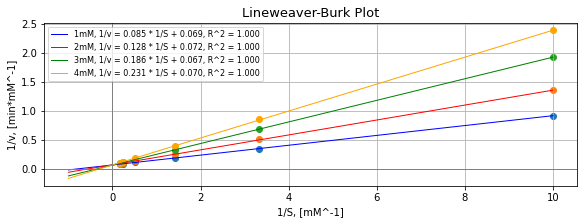

In [79]:
plt.figure(figsize=(8,3))
#Plot
#Linear regressions of data
slope1, intercept1, r_value1, p_value1, std_err1 = stats.linregress(1/S,1/v_1mM)
plt.plot(x, slope1*x+intercept1, 'b')

slope2, intercept2, r_value2, p_value2, std_err2 = stats.linregress(1/S,1/v_2mM)
plt.plot(x, slope2*x+intercept2, 'r')

slope3, intercept3, r_value3, p_value3, std_err3 = stats.linregress(1/S,1/v_3mM)
plt.plot(x, slope3*x+intercept3, 'g')

slope4, intercept4, r_value4, p_value4, std_err4 = stats.linregress(1/S,1/v_4mM)
plt.plot(x, slope4*x+intercept4, 'orange')

#Lines to explicit where are the lines x=0 and y=0 on the graph 
plt.axvline(x = 0, color = 'gray')
plt.axhline(y = 0, color = 'gray')

#Data plotting
plt.scatter(1/S, 1/v_1mM)
plt.scatter(1/S, 1/v_2mM)
plt.scatter(1/S, 1/v_3mM)
plt.scatter(1/S, 1/v_4mM, color='orange')


plt.legend([f"1mM, 1/v = {slope1:.3f} * 1/S + {intercept1:.3f}, R^2 = {r_value1*r_value1:.3f}", f"2mM, 1/v = {slope2:.3f} * 1/S + {intercept2:.3f}, R^2 = {r_value2*r_value2:.3f}",  f"3mM, 1/v = {slope3:.3f} * 1/S + {intercept3:.3f}, R^2 = {r_value3*r_value3:.3f}", f"4mM, 1/v = {slope4:.3f} * 1/S + {intercept4:.3f}, R^2 = {r_value4*r_value4:.3f}"], fontsize=8)
plt.grid()
plt.xlabel("1/S, [mM^-1]")
plt.ylabel("1/v, [min*mM^-1]")
plt.title("Lineweaver-Burk Plot", fontsize = 13)
plt.savefig(f"Lineweaver-Burk_Plot_2.eps")
#Considering that the slope of the lines vary with concentration and so does the x intercept, one understands that this is a competitive inhibition. vmax is more or less constant
#Determination of parameters
vmax = 1/np.mean([intercept1, intercept2, intercept3, intercept4])
print("Vmax", vmax)

In [80]:
#creation of a slope vector
slopes = np.array([slope1, slope2, slope3, slope4])
I = np.array([1, 2, 3, 4]) #mM
x1=np.linspace(-1,4.5,600)

d.2) From visual inspection of the reciprocal plot determine the type of the inhibitor I.

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


vmax 14.414408316382438
Km 0.4770147173156692
KI 0.6650397850459114


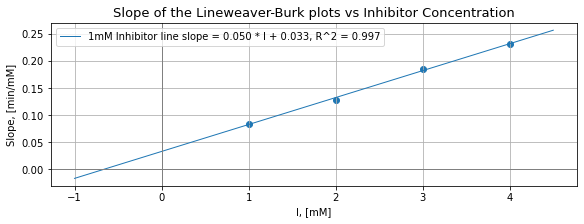

In [82]:
plt.figure(figsize=(8,3))

#Linear regression of slopes
slopeI, interceptI, r_valueI, p_valueI, std_errI = stats.linregress(I,slopes)

#plot
plt.plot(x1, x1*slopeI + interceptI)

#expliciting of x=0 and y=0 in the graph
plt.axvline(x = 0, color = 'gray')
plt.axhline(y = 0, color = 'gray')

plt.legend([f"1mM Inhibitor line slope = {slopeI:.3f} * I + {interceptI:.3f}, R^2 = {r_valueI*r_valueI:.3f}"])
plt.scatter(I, slopes)
plt.grid()
plt.xlabel("I, [mM]")
plt.ylabel("Slope, [min/mM]")
plt.title("Slope of the Lineweaver-Burk plots vs Inhibitor Concentration", fontsize = 13)
plt.savefig(f"slopevsI.eps")

#determination of values
Km=interceptI*vmax
KI=(slopeI*vmax/Km)**-1

print("vmax", vmax)
print("Km", Km) #slope = Km/KIvmax
print("KI", KI) #intercept =km/vmax